# 멀티모달 RAG

텍스트뿐 아니라, 시각적, 청각적 형태를 비롯한 기타 다양한 형태의 정보를 통합적으로 처리함으로써 다양한 데이터 데이터를 동시에 처리할 수 있다는 점에서 유용하다.

또 다른 주요한 특징은 크로스모달 학습 = 서로 다른 모달리티 간의 관계를 학습하여 새로운 연결을 만들어내는 과정

데이터 융합(Fusion) 역시 멀미토달 데이터의 중요한 특징 = 여러 유형의 데이터를 하나의 모델에서 처리함으로써 정보의 종합적인 이해와 해석이 가능해짐

고차원 분석을 가능하게 함

데이터 처리의 효율성 = 자원과 시간 면에서 효율적

### 1) 멀티모달 인코더

텍스트, 이미지, 오디오, 비디오 등 서로 다른 유형의 데이터를 하나의 통합된 표현 공간으로 변환하는 기술

대표적인 멀티모달 인코더
- CLIP(Contrastive Language-Image Pretraining)
  - 대조 학습(Constrastive Learning)을 통해 텍스트와 이미지가 일치하는 쌍은 가까이 배치하고, 일치하지 않는 쌍은 멀리 배치하는 것
  - 대규모 검색 및 매칭에 적합
- ViLT(Vision-and-Language Transformer)
  - 트랜스포머 기반의 모델로, 이미지와 텍스트 데이터를 동시에 처리하는 기능을 갖추고 있음
  - 이미지를 패치(patch) 단위로 나누어 텍스트 토큰과 함께 트랜스포머에 입력하여 처리
  - 설명 생성에서 뛰어난 성능

### 2) 멀티모달 생성을 위한 디코더

디코더는 검색된 다양한 형식의 정보를 기반으로 새로운 텍스트를 생성하는 핵심적인 기능을 수행

대표적인 모델
- GPT(Generative Pretrained Transformer)
  - OpenAI 사
  - 멀티모달 데이터를 동시에 입력 받아 멀티모달 데이터 생성 가능
  - 상황 맥락 이해 및 추론 능력 우수, 이미지의 세부 정보 기반 생성
- T5(Text-To-Text Transfer Transformer)
  - Google 사
  - 멀티모달 데이터를 텍스트로 변환 후 새로운 텍스트 생성
  - 다양한 문제를 하나의 프레임워크로 처리, 태스크 인식 기능 활용

### 3) 지식 검색 및 증강

두 가지 기술
- DPR(Dense Passage Retrieval)
  - 주어진 쿼리와 문서를 고차원의 벡터로 변환한 후, 벡터 공간에서 유사성을 기반으로 관련 문서나 이미지를 검색하는 방식
  - bi-encoder 방식을 사용하여, 쿼리와 문서를 각각 독립적으로 인코딩 한 후, 벡터 간의 내적(dot product)을 통해 유사도를 계산
- FAISS(Facebook AI Similarity Search)
  - 대규모 벡터 데이터를 효율적으로 검색할 수 있는 오픈소스 라이브러리
  - ANN(Approximate Nearest Neighbor)을 사용하여 검색 속도를 최적화
  - ANN의 구현의 핵심 요소는
    - PQ(Product Quantization)
      - 원본 벡터를 서브 벡터로 분할하고 이를 클러스터링한 다음 각각의 최근접 센트로이드 ID로 대체하는 방법으로 양자화함으로써 데이터를 효과적으로 압축
    - HNSW(Hierarchical Navigable Small World)
      - 여러 계층으로 이뤄진 구조
      - 상위 계층은 노드가 적고 덜 밀집되어 있으며 하위 계층으로 갈수록 노드가 점점 많아지고 밀집도가 높아짐
      - 상위 계층으로의 탐색은 줌 아웃, 하위 계층으로으 탐색은 줌 인
      - 처음에는 줌 아웃을 통해 넓은 범위를 탐색하고 이후 줌 인을 통해서 보다 세부적인 탐색을 진행

서로 보완적으로 사용 가능  
멀티모달 RAG 시스템이 특정 질문을 받는다고 가정하면
- DPR은 의미적 유사성을 기반으로 관련 텍스트와 이미지를 검색하고
- FAISS는 다양한 모달리티 데이터를 빠르게 비교하여 가장 관련성 높은 정보를 찾아낼 수 있다.

### 4) 융합 기술

멀티모달 데이터를 효과적으로 결합하는 융합 기술

대표적인 융합 기법
- Late Fussion(후기 융합)
  - 멀미모달 데이터를 처리할 때 각 모달리티를 독립적으로 처리한 후, 마지막 단계에서 그 결과를 결합하는 방식
  - 모달리티 독립성 제공 -> 모델 구조의 유연성 장점 -> 상호작용 부족 이라는 단점
- Cross-Attention
  - 트랜스포머 기반 모델에서 사용되는 기술로, 두 개 이상의 모달리티 간의 상호작용을 강화하는 데 중점
  - 상호 참조의 강화가 핵심

상호 보완적으로 사용될 수 있음
- 초기 단계에서는 각 모달리티를 독립저그로 처리하여 중요한 특성을 추출하고, 최종 단계에서는 크로스 어텐션을 통해 두 모달리티간의 상호작용을 최적화하는 방식으로 융합

### 5) 모델 학습과 파인튜닝

멀티모달 RAG 시스템에서 사용하는 모델들은 사전 학습(Pre-training)과 파인튜닝(Fine-tuning) 과정을 통해 최적화

사전 학습의 핵심은 
- 자기 지도 학습(Self-supervised Learning)
  - 데이터를 레이블링할 필요 업이 모델이 데이터를 스스로 이해하도록 유도하는 방식으로, 멀티모달 환경에서 자주 사용됨
  - 텍스트-이미지 pair 데이터가 주어지는 경우
    - 모델은 텍스트와 이미지 간의 연광성을 학습하는데 이미지를 보고 텍스트 설명을 예측하거나, 반대로 텍스트 설명을 보고 그에 맞는 이미지를 예측하는 작업을 반복
    - 대조 학습이 자주 사용됨
- 대규모 파라미터 조정이 중요

파인튜닝
- 사전 학습을 마친 모델은 일반적인 멀티모달 데이터를 이해할 수 있는 기본 능력을 갖추고 있지만, 이를 특정 응용 분야에 맞추기 위해서는 파인튜닝이 필요함
- 도메인 특화 데이터셋을 사용하는 것이 필수적
- 자주 사용되는 기법 중 하나는 전이 학습(Transfer Learning)

<hr></hr>

#### 실습

멀티모달 모델에서 문서를 처리할 때는 주로 다음의 세 가진 방법을 고려
- 1. CLIP과 같은 멀티모달 임베딩을 사용하여 이미지와 텍스트를 임베딩하고 유사도 기반으로 이미지와 텍스트를 찾아 멀티모달 LLM에 전달하는 방식
- 2. GPT-4o와 같은 멀티모달 LLM을 활용하여 이미지에서 텍스트 요약을 생성하는 방법으로, 유사도 기반으로 텍스트를 찾고 텍스트만 LLM에 전달하는 방식
- 3. GPT-4o와 같은 멀티모달 임베딩을 사용하여 이미지에서 텍스트 요약을 생성했다가 원본 이미지와 함께 저장하고 검색된 결과를 이미지와 텍스트 모두 멀티모달 LLM에게 제공해주는 방식

여기서는 3번 방식으로 GPT를 활용하여 간단한 멀티모달 RAG를 구현해 보자.

In [1]:
!pip install python-dotenv

In [17]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
!pip install -U \
langchain==0.3.7 \
openai==1.55.0 \
langchain-chroma==0.1.4 \
langchain-experimental==0.3.3 \
SQLAlchemy==2.0.35 \
chromadb==0.5.20 \
fastapi==0.115.5 \
dataclasses-json==0.6.7 \
httpx-sse==0.4.0 \
pydantic==2.9.2 \
pydantic-settings==2.6.1

In [4]:
!pip install \
unstructured[all-docs]==0.16.6 \
pillow==11.0.0 \
pydantic==2.9.2 \
lxml==5.3.0 \
matplotlib==3.8.0 \
chromadb==0.5.20 \
tiktoken==0.8.0

In [5]:
# !sudo apt-get update
# !pip install pdf2image==1.17.0
# !pip install --user -U nltk==3.9.1
# !sudo apt-get install -y poppler-utils
# !sudo apt install -y tesseract-ocr
# !sudo apt install -y libtesseract-dev

In [6]:
!pip install --upgrade \
nltk==3.9.1 \
click==8.1.7 \
joblib==1.4.2 \
regex==2024.9.11 \
tqdm==4.66.6

In [11]:
import nltk, os
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('all')
# os.makedirs('/home/haiqv/nltk_data/tokenizers/punkt/PY3_tab', exist_ok=True)

[nltk_data] Downloading package punkt to /home/haiqv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/haiqv/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/haiqv/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/haiqv/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/haiqv/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/haiqv/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_p

True

In [ ]:
!pip install pdfminer.six==20231228 pdfplumber==0.11.5

In [1]:
# PDF 에서 텍스트와 레이블을 구분하여 처리

from langchain_text_splitters import CharacterTextSplitter
from unstructured.partition.pdf import partition_pdf
import os
os.environ['PATH'] += ':/usr/bin/tesseract'

def extract_pdf_elements(path, fname):
    return partition_pdf(
        filename=path + fname,
        extract_images_in_pdf=True,
        infer_table_structure=True,
        chunking_strategy="by_title",
        max_characters=4000,
        new_after_n_chars=3800,
        combine_text_under_n_chars=2000,
        image_output_dir_path=path,
    )


def categorize_elements(raw_pdf_elements):
    tables = []
    texts = []
    for element in raw_pdf_elements:
        if "unstructured.documents.elements.Table" in str(type(element)):
            tables.append(str(element))
        elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
            texts.append(str(element))
    return texts, tables

/home/haiqv/conda/envs/rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
!pip install hf_xet

  Using cached hf_xet-1.0.5-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (494 bytes)
Using cached hf_xet-1.0.5-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (54.0 MB)


In [12]:
!export NLTK_DATA=/home/haiqv/nltk_data

fpath = "./"
fname = "fire.pdf"

raw_pdf_elements = extract_pdf_elements(fpath, fname)   # 이미지, 표, 텍스트를 추출

texts, tables = categorize_elements(raw_pdf_elements)   # 표와 텍스트로 분류

In [13]:
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=4000, chunk_overlap=0
)
joined_texts = " ".join(texts)
texts_4k_token = text_splitter.split_text(joined_texts)

In [15]:
!pip install langchain_openai

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.2/661.2 kB 24.8 MB/s eta 0:00:00
Using cached packaging-24.2-py3-none-any.whl (65 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
  Attempting uninstall: openai
    Found existing installation: openai 1.55.0
    Uninstalling openai-1.55.0:━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [openai]
      Successfully uninstalled openai-1.55.0━━━━━━━━━━━━━━━━━━ 1/3 [openai]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [langchain_openai][openai]


In [18]:
# 텍스트와 테이블 요약

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

def generate_text_summaries(texts, tables, summarize_texts=False):
    prompt_text = """당신은 테이블과 텍스트를 요약하여 검색에 사용할 수 있도록 돕는 어시스턴트입니다. \
이 요약은 임베딩되어 원문 텍스트 또는 테이블 요소를 검색하는 데 사용됩니다. \
테이블 또는 텍스트를 간결하게 요약하고 검색에 최적화된 내용을 작성하세요. 테이블 또는 텍스트: {element} \
한국어로 작성하세요."""
    prompt = ChatPromptTemplate.from_template(prompt_text)

    model = ChatOpenAI(temperature=0, model="gpt-4o")
    summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

    text_summaries = []
    table_summaries = []

    if texts and summarize_texts:
        text_summaries = summarize_chain.batch(texts, {"max_concurrency": 5})
    elif texts:
        text_summaries = texts

    if tables:
        table_summaries = summarize_chain.batch(tables, {"max_concurrency": 5})

    return text_summaries, table_summaries

text_summaries, table_summaries = generate_text_summaries(
    texts_4k_token, tables, summarize_texts=True
)

In [19]:
text_summaries

['이 텍스트는 구조화되지 않은 데이터로, 명확한 의미를 파악하기 어렵습니다. 그러나 주어진 내용을 바탕으로 요약을 시도해보겠습니다.\n\n요약:\n- ANSOIAl, QE, M7, DE sel 등의 반복적인 패턴이 나타납니다.\n- 다양한 코드나 약어가 포함되어 있으며, 특정한 규칙이나 형식에 따라 나열된 것으로 보입니다.\n- 텍스트는 주로 대문자로 구성되어 있으며, 특정한 의미를 전달하기보다는 데이터나 코드의 나열로 보입니다.\n\n검색 최적화:\n- ANSOIAl, QE, M7, DE sel 등의 키워드를 중심으로 검색할 수 있습니다.\n- 반복되는 패턴이나 코드가 중요한 요소일 수 있습니다.\n\n이 요약은 주어진 텍스트의 구조적 특성을 바탕으로 작성되었습니다. 추가적인 정보가 필요할 경우, 원문을 참조하시기 바랍니다.']

In [20]:
table_summaries

[]

In [ ]:
# 이미지 요약

import base64
import os

from langchain_core.messages import HumanMessage

figures_path = "./figures/"

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


def image_summarize(img_base64, prompt):
    chat = ChatOpenAI(model="gpt-4o", max_tokens=1024)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

# 이미지 요약에 적절한 프롬프트를 이용하여 이전에 생성한 이미지 요약 함수를 활용하여 이미지 요약을 생성
def generate_img_summaries(path):
    img_base64_list = []

    image_summaries = []

    prompt = """당신은 이미지를 요약하여 검색에 사용할 수 있도록 돕는 어시스턴트입니다.
이 요약은 임베딩되어 원본 이미지를 검색하는 데 사용됩니다.
이미지를 간결하게 요약하고 검색에 최적화된 내용을 작성하세요.
한국어로 작성하세요."""

    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))

    return img_base64_list, image_summaries

img_base64_list, image_summaries = generate_img_summaries(figures_path)

In [23]:
# 멀티모달 RAG 구현

# 생성한 문서의 요약을 멀티 벡터 저장소에 저장

import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

def create_multi_vector_retriever(
    vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images
):
    store = InMemoryStore()
    id_key = "doc_id"

    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )

    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]
        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    if text_summaries:
        add_documents(retriever, text_summaries, texts)
    if table_summaries:
        add_documents(retriever, table_summaries, tables)
    if image_summaries:
        add_documents(retriever, image_summaries, images)

    return retriever

vectorstore = Chroma(
    collection_name="multimodal_rag", embedding_function=OpenAIEmbeddings()
)

retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    texts,
    table_summaries,
    tables,
    image_summaries,
    img_base64_list,
)

In [24]:
# base64로 이미지를 처리하는 함수

import io
import re

from IPython.display import HTML, display
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from PIL import Image


def plt_img_base64(img_base64):
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    display(HTML(image_html))


def looks_like_base64(sb):
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


def is_image_data(b64data):
    image_signatures = {
        b"\xff\xd8\xff": "jpg",
        b"\x89\x50\x4e\x47\x0d\x0a\x1a\x0a": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False


def resize_base64_image(base64_string, size=(128, 128)):
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    resized_img = img.resize(size, Image.LANCZOS)

    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    return base64.b64encode(buffered.getvalue()).decode("utf-8")


def split_image_text_types(docs):
    b64_images = []
    texts = []
    for doc in docs:
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)
    return {"images": b64_images, "texts": texts}


def img_prompt_func(data_dict):
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    text_message = {
        "type": "text",
        "text": (
            "당신은 인텔리전트 Q&A 챗봇입니다. \n"
            "사용자가 제공하는 텍스트, 표, 그리고 주로 차트나 그래프 형태의 이미지를 바탕으로 정보를 분석합니다.\n"
            "이 정보를 활용하여 사용자 질문에 관련된 조언을 제공합니다. \n"
            f"사용자가 제공한 질문: {data_dict['question']}\n\n"
            "텍스트나 테이블:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]


def multi_modal_rag_chain(retriever):
    model = ChatOpenAI(temperature=0, model="gpt-4o", max_tokens=1024)
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )

    return chain

chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)


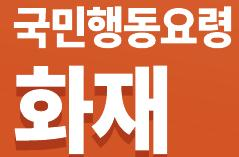


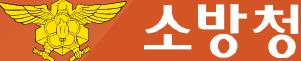


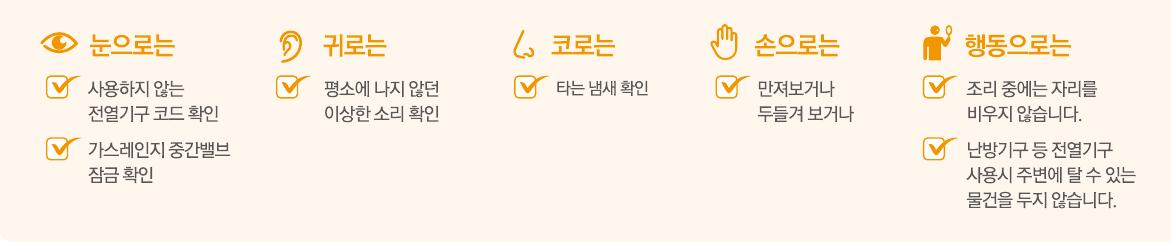


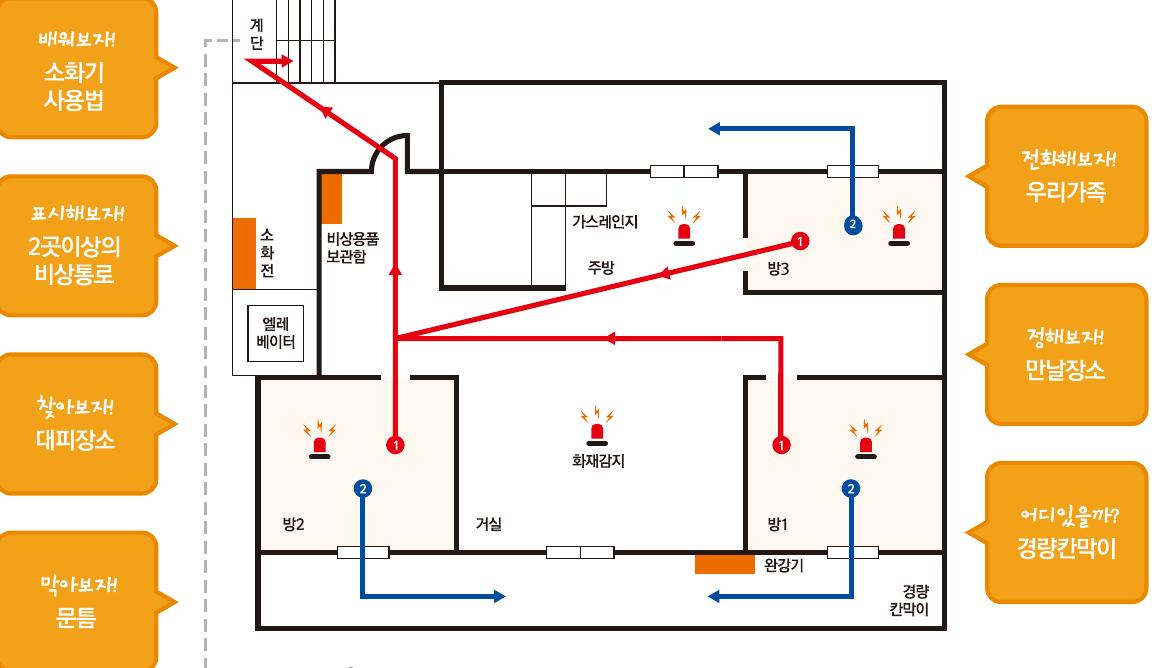


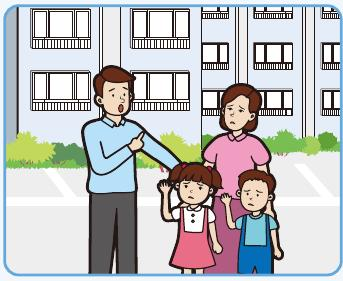


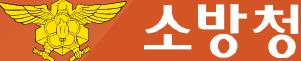


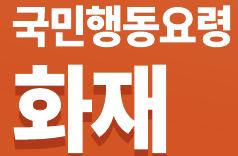


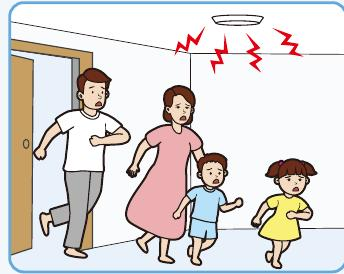


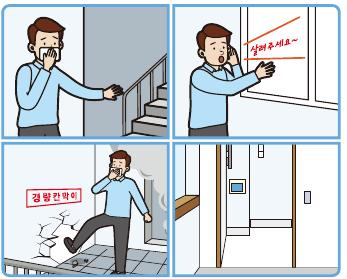


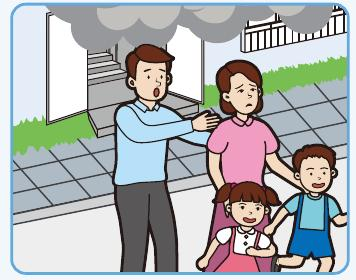


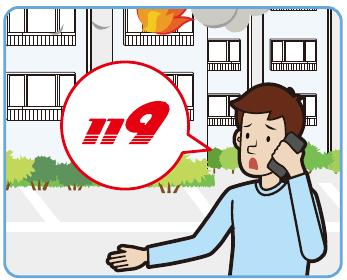


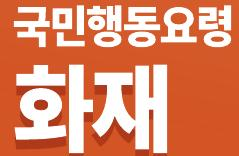


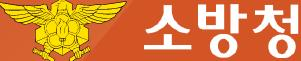


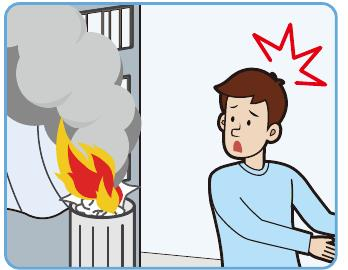


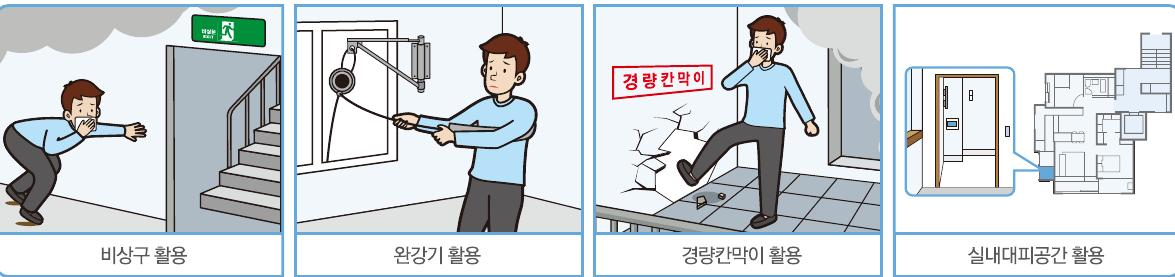


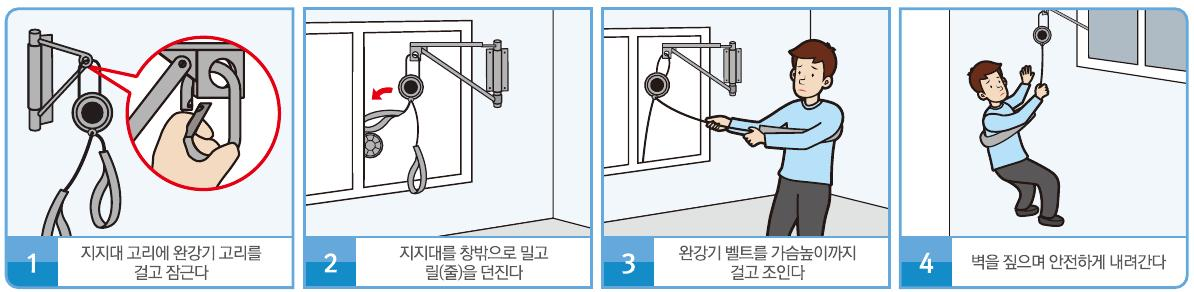


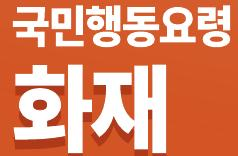


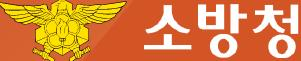


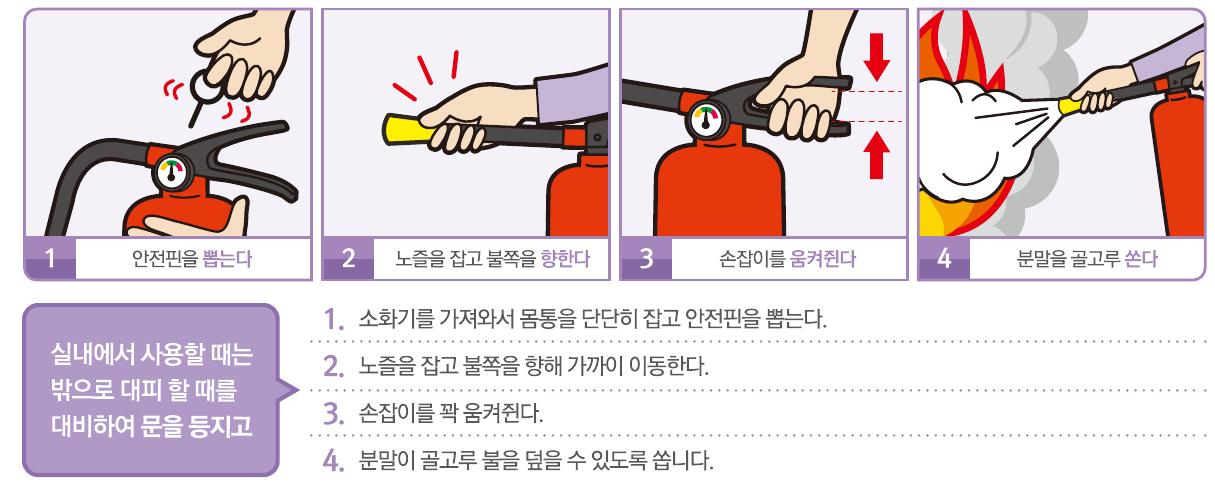


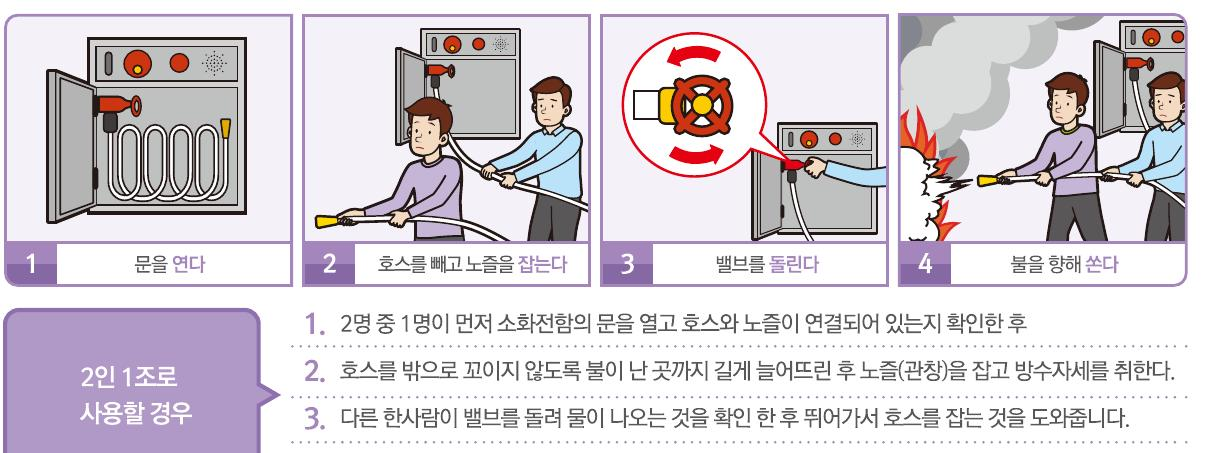


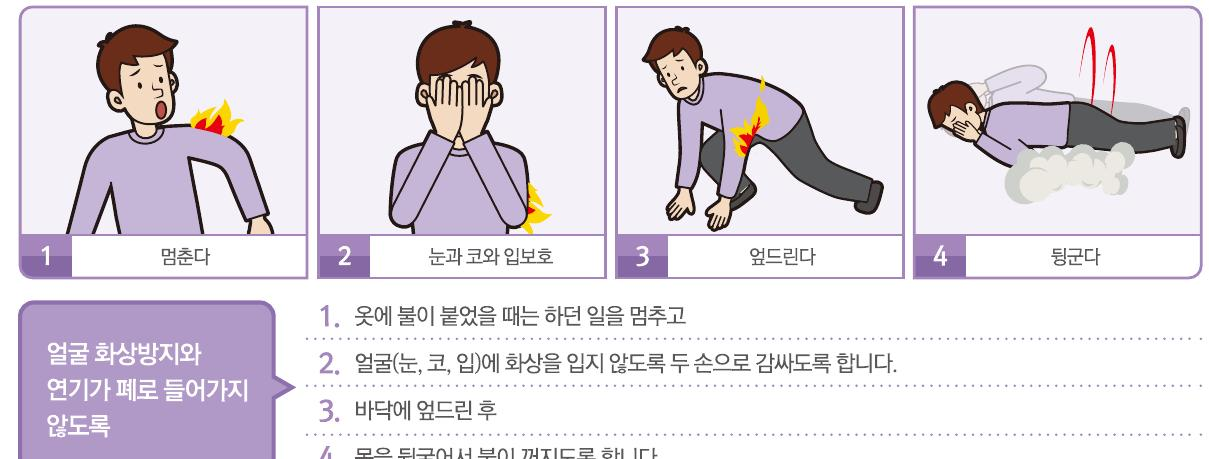


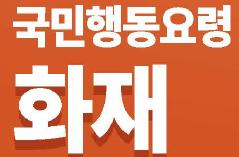


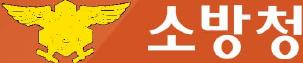


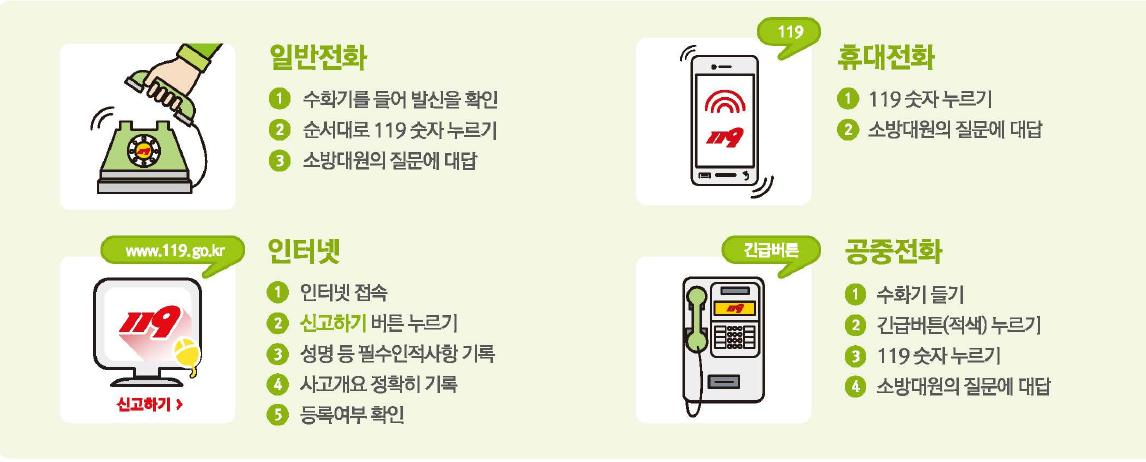


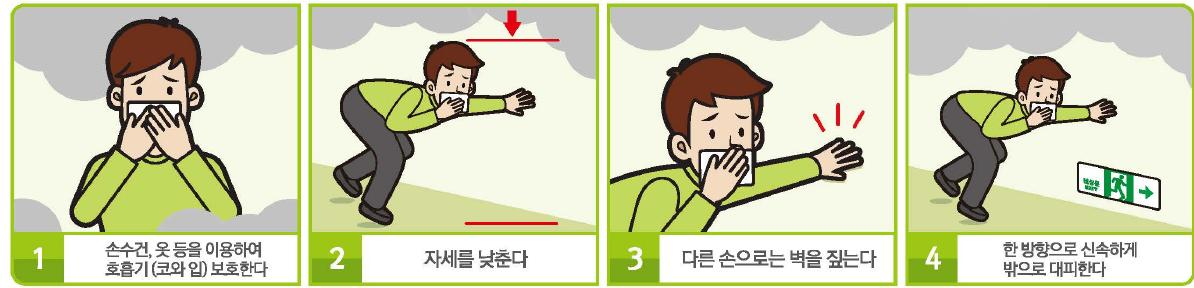


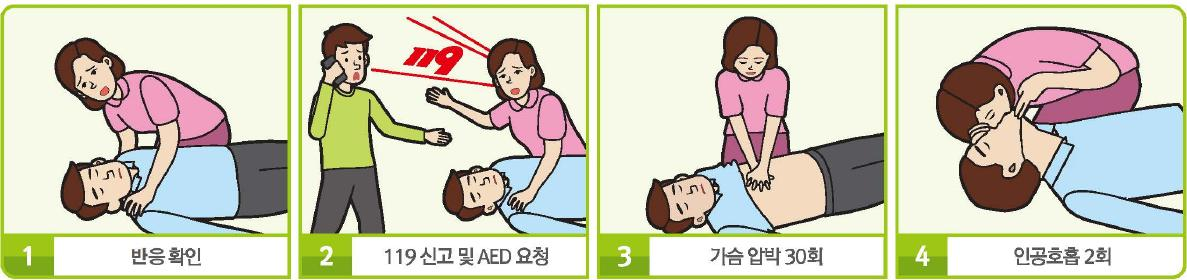


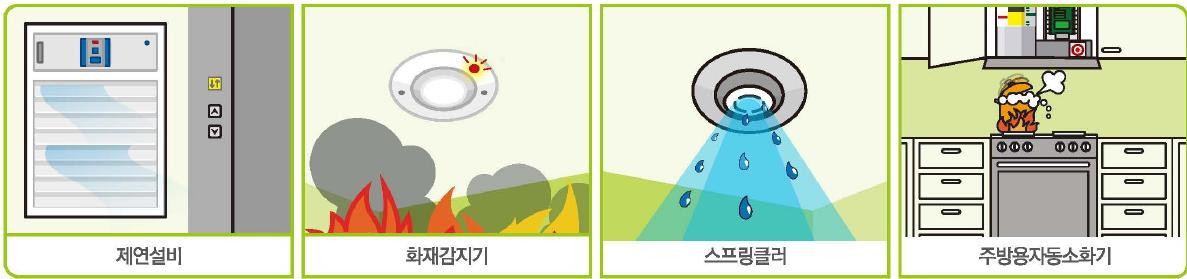

In [25]:
for i in range(len(img_base64_list)):
  plt_img_base64(img_base64_list[i])

In [28]:
# Check retrieval
query = "소화전 사용 방법을 알려주세요"
docs = retriever_multi_vector_img.invoke(query, limit=6)


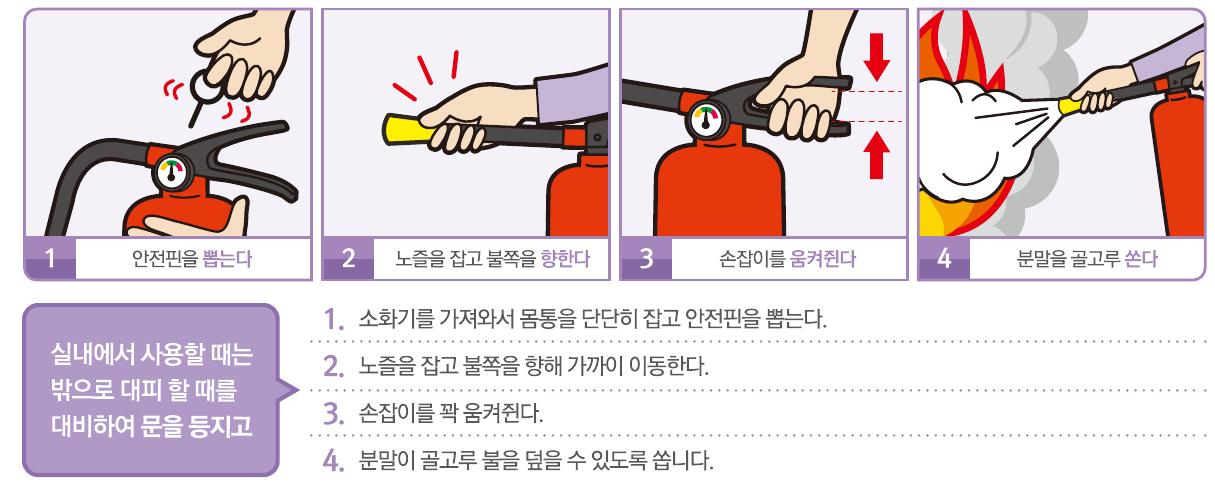


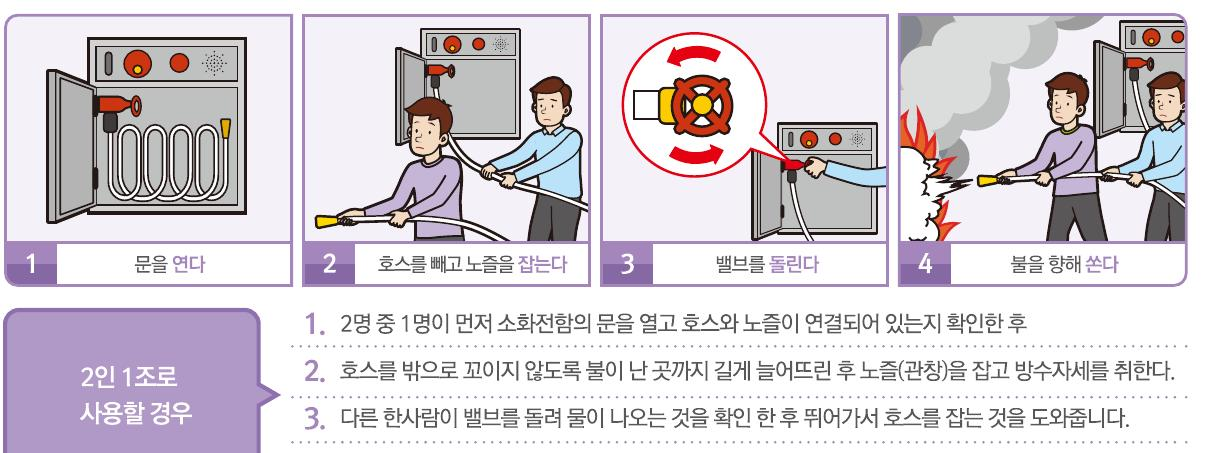


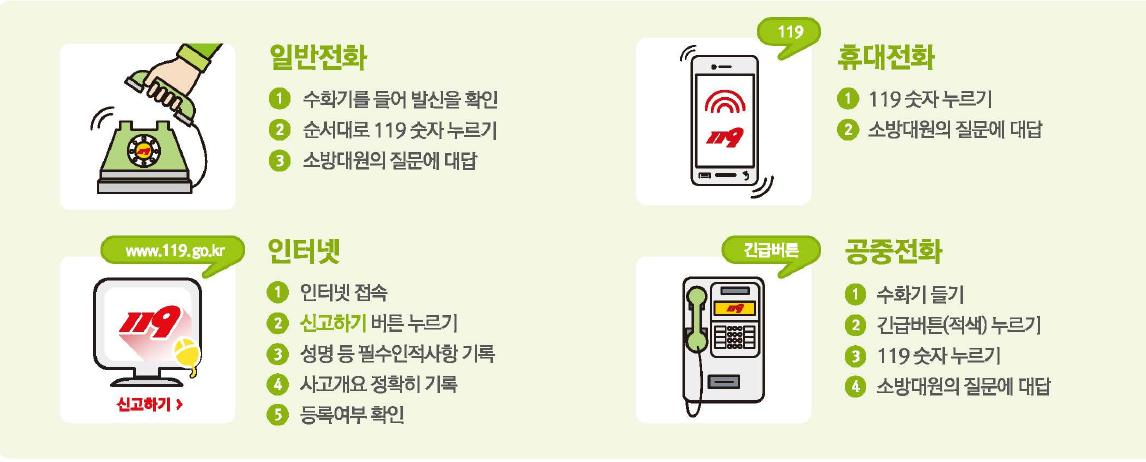


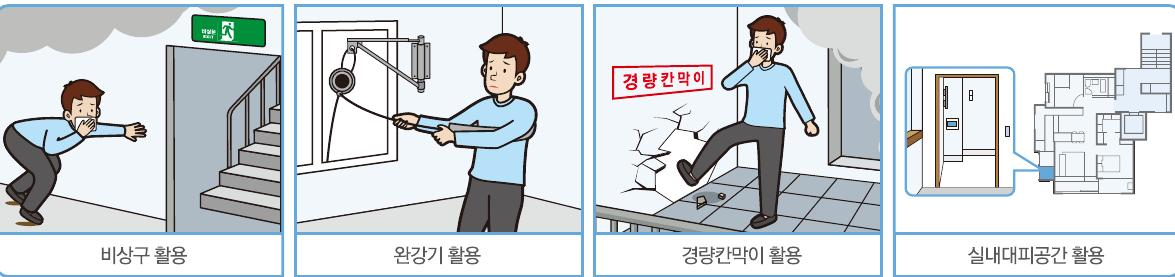

In [29]:
# We get back relevant images
for i in range(len(docs)):
  plt_img_base64(docs[i])

In [30]:
print(image_summaries[19])

이 이미지는 2인 1조로 소화전 사용법을 설명합니다. 첫 번째 단계에서 소화전함의 문을 열고, 두 번째로 호스를 빼고 노즐을 잡습니다. 세 번째 단계에서는 밸브를 돌리고, 마지막으로 불을 향해 물을 뿌립니다. 각 단계마다 시각적 설명이 포함되어 있습니다.


In [31]:
# Run RAG chain
result = chain_multimodal_rag.invoke(query)

In [32]:
print(result)

소화전 사용 방법은 다음과 같습니다:

1. **문을 연다**: 소화전함의 문을 엽니다.
2. **호스를 빼고 노즐을 잡는다**: 호스를 꺼내어 노즐을 잡습니다.
3. **밸브를 돌린다**: 밸브를 돌려 물이 나오도록 합니다.
4. **불을 향해 쏜다**: 노즐을 불 쪽으로 향해 물을 뿌립니다.

이 과정은 두 사람이 함께 진행하는 것이 좋습니다. 한 사람이 밸브를 돌리고, 다른 사람이 호스를 잡고 불을 향해 물을 뿌립니다.
